# Titanic Problem

** Predict the probability of surviving the titanic **

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# Statsmodels logistic regression is sm.Logit
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
### take the mean to fill in missing data
titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))
### dummy code whether or not they had parents, siblings, gender
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)
titanic['is_female'] = titanic.Sex.apply(lambda x: 1 if x == 'female' else 0)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,had_parents,had_siblings,is_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0


In [5]:
X = titanic[['Age', 'is_female']]

y = titanic['Survived']

lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.540747
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 May 2017   Pseudo R-squ.:                  0.1880
Time:                        22:28:10   Log-Likelihood:                -481.81
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.960e-50
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Age           -0.0389      0.003    -12.303      0.000        -0.045    -0.033
is_female      2.1757      0.163     13.348      0.000         1.856     2.495
==============================================================================
"""

#### Find the best variables to include. Current function value: <-- we want this value closer to 1. Here we can't look at the R squared bc this is a classification model

In [6]:
X = titanic[['had_siblings', 'is_female']]

#current function value rank when each variable is isolated: had siblings, fare, is_female
#adding 'Fare' only changed the value by a very small amount, and it's not statistically significant

y = titanic['Survived']

lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.628736
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 May 2017   Pseudo R-squ.:                 0.05583
Time:                        22:28:10   Log-Likelihood:                -560.20
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 3.978e-16
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
had_siblings    -0.8982      0.151     -5.938      0.000        -1.195    -0.602
is_female        1.5050      0.156      9.659      0.000         1.200     1.810
================================================================================
"""

#### Test other outcomes

In [7]:
X = titanic[['had_siblings', 'Fare', 'is_female']]

y = titanic['Survived']

lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.628677
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Sun, 07 May 2017   Pseudo R-squ.:                 0.05592
Time:                        22:28:10   Log-Likelihood:                -560.15
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 3.905e-15
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
had_siblings    -0.9132      0.158     -5.771      0.000        -1.223    -0.603
Fare             0.0005      0.001      0.324      0.746        -0.002     0.003
is_female        1.4919      0.161      9.273      0.000         1.177     1.807
================================================================================
"""

#### Check ROC & AUC

---coef_
[[-0.17578862  0.01157242  2.36422671]]
---intercept_
[-1.6914714]
ROC AUC ---
0.819696098169


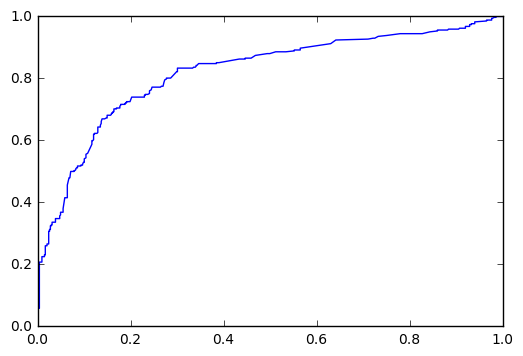

In [8]:
import numpy as np
from sklearn import metrics
# starter-code-10 uses matplotlib

X = titanic[['had_siblings', 'Fare', 'is_female']]

y = titanic['Survived']

#Logical regression in Stat model
#lm = sm.Logit(y, X)
#result = lm.fit()
#result.summary()

lm2 = LogisticRegression()
lm2.fit(X, titanic['Survived'])
print "---coef_"
print lm2.coef_
print "---intercept_"
print lm2.intercept_

lm2.fit(X, titanic['Survived'])

titanic['probability_1'] = lm2.predict_proba( X  ).T[1]

ax = plt.subplot(111)
vals = metrics.roc_curve(titanic['Survived'], titanic['probability_1'])
ax.plot(vals[0], vals[1])

print "ROC AUC ---"
print metrics.roc_auc_score( titanic['Survived'], titanic['probability_1'] )

##### After getting coeffients we have to apply exponent to get odds ratio to use the relation while explaining the relationship between features and outcome. Ex: Females were 11 more likely to survive (coef 2.36 exponent) ==> 

In [9]:
import numpy as np
print np.exp(2.36)

10.5909514524


#### Check correlations

                   Age  had_siblings    Pclass      Fare  is_female
Age           1.000000     -0.154778 -0.407015  0.118308  -0.112851
had_siblings -0.154778      1.000000 -0.076009  0.192190   0.203203
Pclass       -0.407015     -0.076009  1.000000 -0.549500  -0.131900
Fare          0.118308      0.192190 -0.549500  1.000000   0.182333
is_female    -0.112851      0.203203 -0.131900  0.182333   1.000000
Axes(0.125,0.125;0.62x0.775)


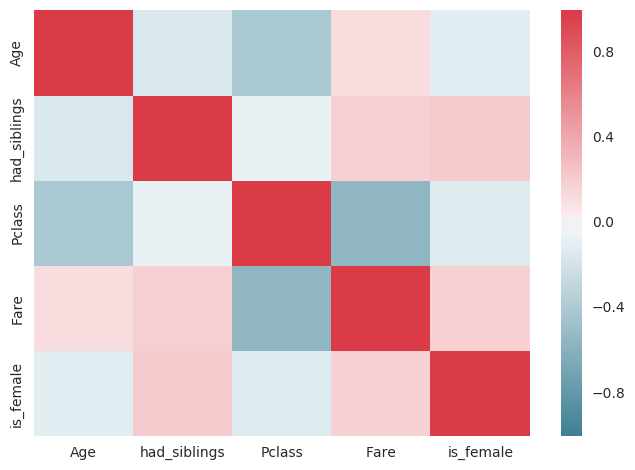

In [10]:
import seaborn as sns
sns.set_style("darkgrid")

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = titanic[['Age', 'had_siblings', 'Pclass', 'Fare', 'is_female']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

              is_female  had_siblings      Fare
is_female      1.000000      0.203203  0.182333
had_siblings   0.203203      1.000000  0.192190
Fare           0.182333      0.192190  1.000000
Axes(0.125,0.125;0.62x0.775)


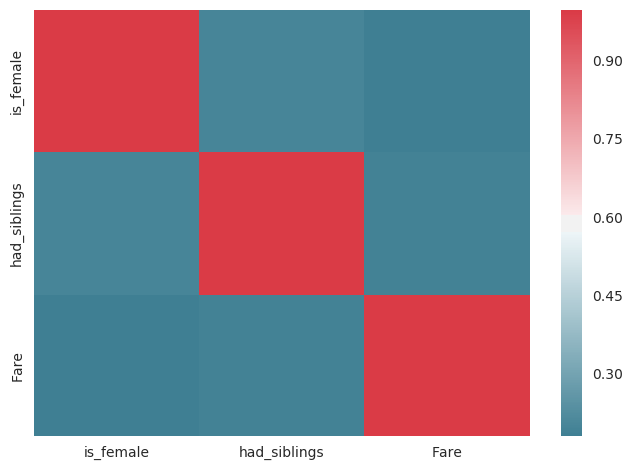

In [11]:
import seaborn as sns
sns.set_style("darkgrid")

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = titanic[['is_female', 'had_siblings', 'Fare']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

#### Isolate the variable pairs that might be correlated

        Pclass    Fare
Pclass  1.0000 -0.5495
Fare   -0.5495  1.0000
Axes(0.125,0.125;0.62x0.775)


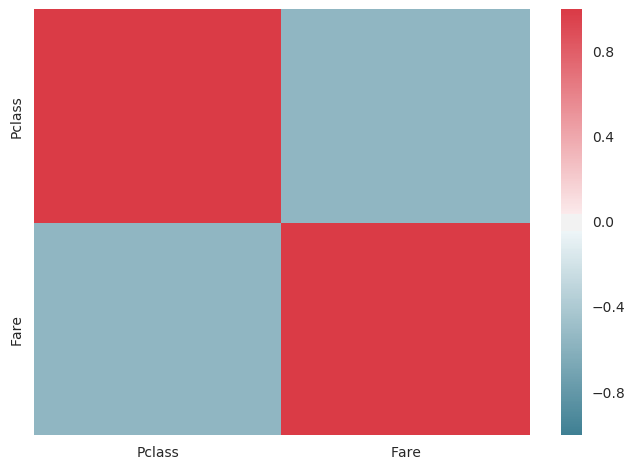

In [12]:
import seaborn as sns
sns.set_style("darkgrid")

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = titanic[['Pclass', 'Fare']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

                   Age  had_siblings
Age           1.000000     -0.154778
had_siblings -0.154778      1.000000
Axes(0.125,0.125;0.62x0.775)


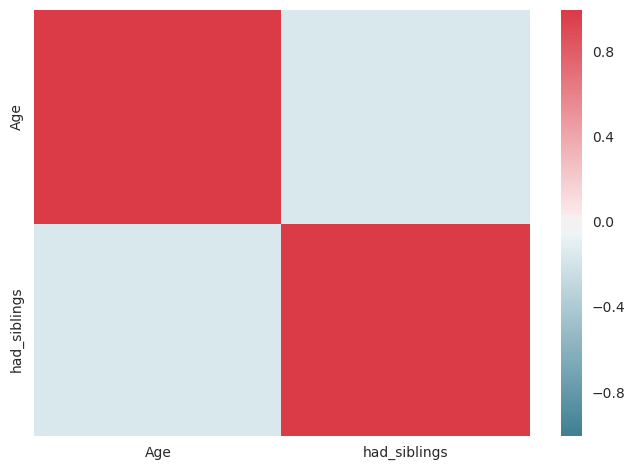

In [13]:
import seaborn as sns
sns.set_style("darkgrid")

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = titanic[['Age', 'had_siblings']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

#### Plot histograms

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

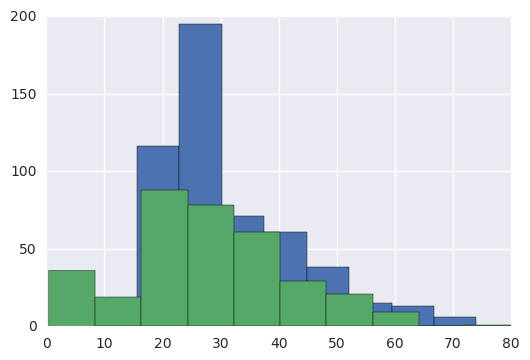

In [14]:
%matplotlib inline
titanic.groupby('Survived').Age.hist()

In [15]:
# use cross-validation , & k-folds

In [16]:
X = titanic[['had_siblings', 'is_female', 'Pclass']]

#current function value rank: had siblings, fare, is_female

y = titanic['Survived']

lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.468204
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Sun, 07 May 2017   Pseudo R-squ.:                  0.2969
Time:                        22:28:12   Log-Likelihood:                -417.17
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 3.131e-77
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
had_siblings     0.0686      0.181      0.379      0.705        -0.287     0.424
is_female        2.6688      0.181     14.728      0.000         2.314     3.024
Pclass          -0.7179      0.052    -13.915      0.000        -0.819    -0.617
================================================================================
"""